# ビッグデータとJson
#### この章では、プログラミングのデータ分析における重要性を実用的な視点から解説します。基礎編としては難易度が高いので、実用的なデータ分析プログラミングがどのようなものなのか、考え方を理解するようにしてください。
1. インターネットは、snsなどビッグデータの宝庫。大量に収集すればいろいろな発見がある。しかし、いちいちマウスでコピペは現実的ではない
2. 誰もがプログラミングで簡単にビッグデータを入手できるような仕組みが整いつつある
3. API(Application Programming Interface)は、インターネットのビッグデータをプログラミングで自動収集の仕組みの世界標準
4. APIによって収集するデータ形式は、ほとんどの場合JSON

# 1. ビッグデータの保管庫（サーバー）
### 1)  普段何気なく見ているホームページ、SNSはすべてサーバーに保管されたページを取り出してみている  
### 2)  サーバーはコンピュータという意味では皆さんのPCと仕組みは何ら変わらないが、以下のような点で違いがある
- PC ：サーバーに閲覧したいページをリクエストする
-  サーバー：世界中24時間365日、PCからページのリクエストを受け付けて必要なページを返却する
       
### 3) そのため、サーバーはPCに比べて忙しい！　以下のような性能が求められる。
-  無停止（高信頼性)### 4) PC(スマホ）は、クライアントと総称される
- インターネットでwebサイトを閲覧するコンピュータの仕組みは、”クライアントサーバー”と呼ばれる
い


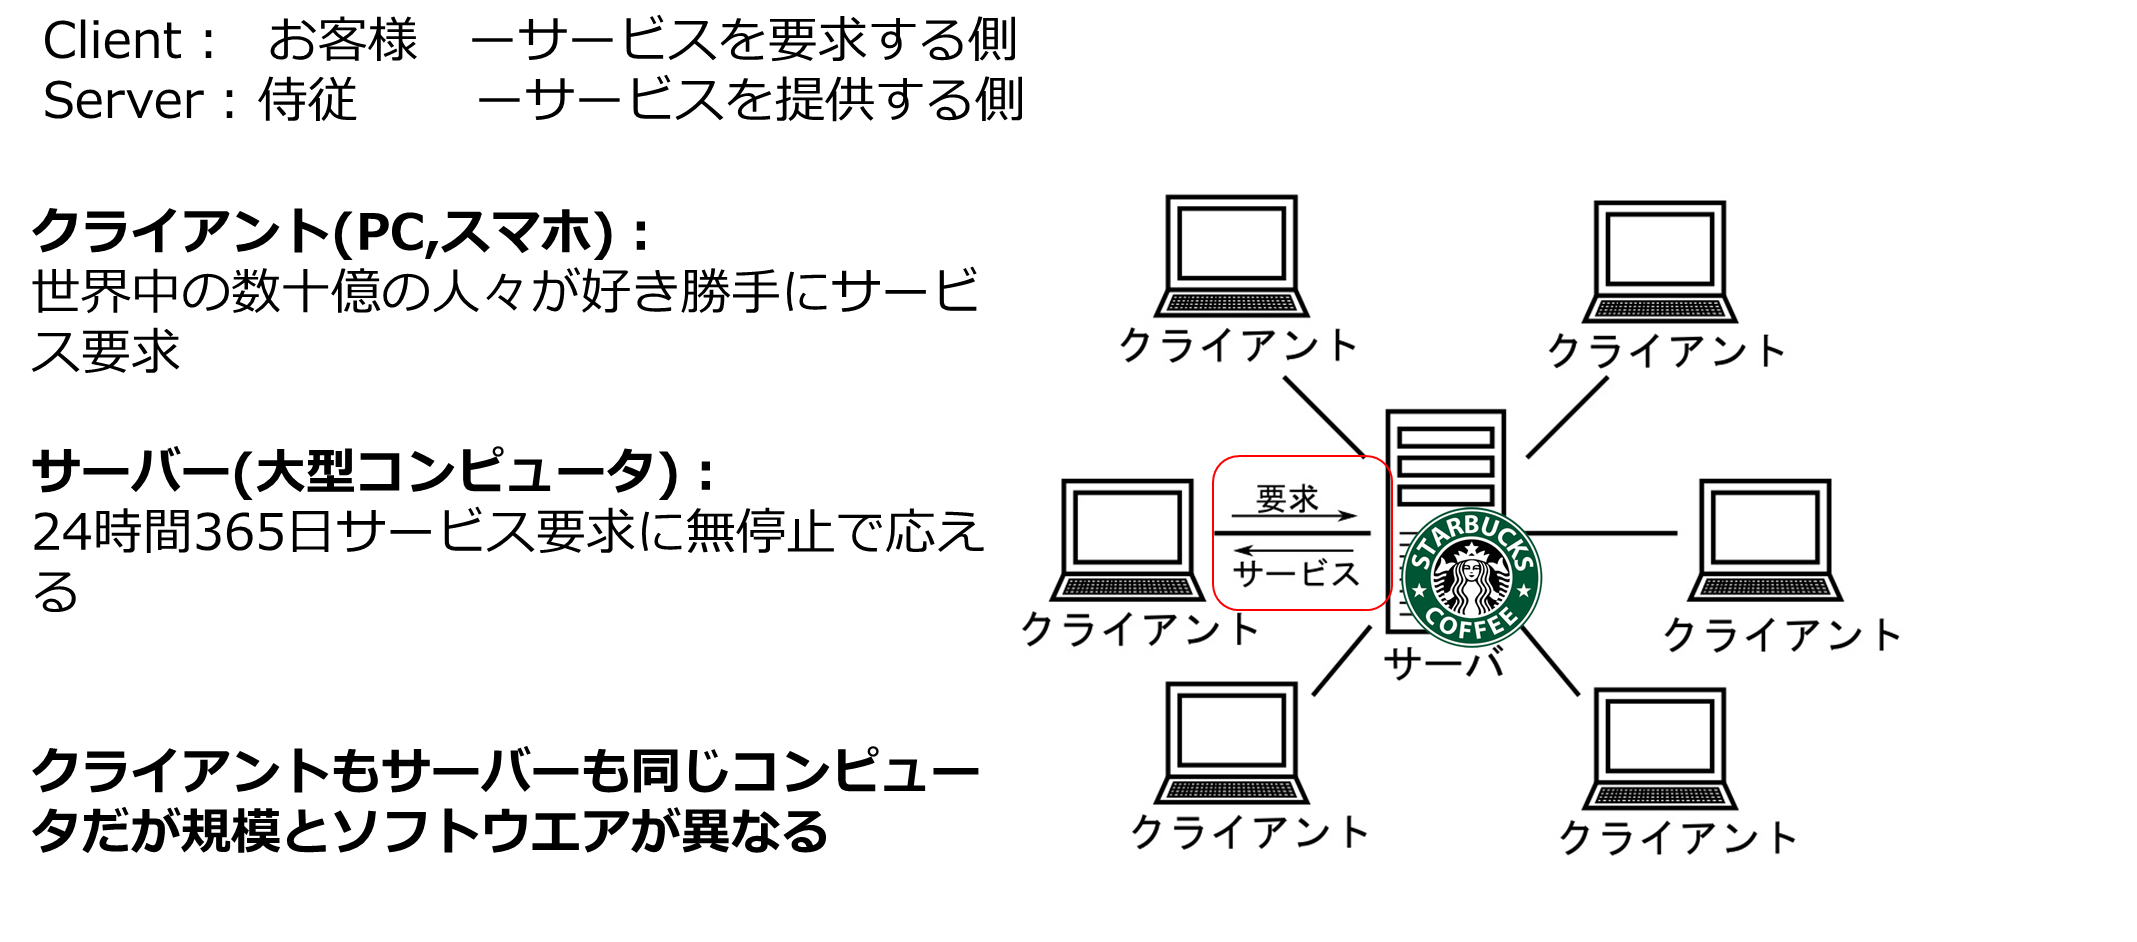

### 5) サーバーからビッグデータを効率的に収集する方法
- サーバーに保管しているデータをブラウザでページ毎に閲覧するのでは、効率的でない
- ブラウザの代わりに、プログラミングで効率的にデータを収集するために**API**が用意されている

# 2. API(Application Programming Interface)による大量データの収集
- プログラムから大量にデータ収集することを目的に作られたサーバーの窓口- ブラウザでなくて、プログラムで一挙に大量データを取り込む
- APIにPC（クライアント）から欲しいデータをリクエストすると、APIはそのデータをサーバーから取り出してPCに返却する
- APIから返却されるデータ形式はJSONと呼ばれる形式で世界的に統一されている
　


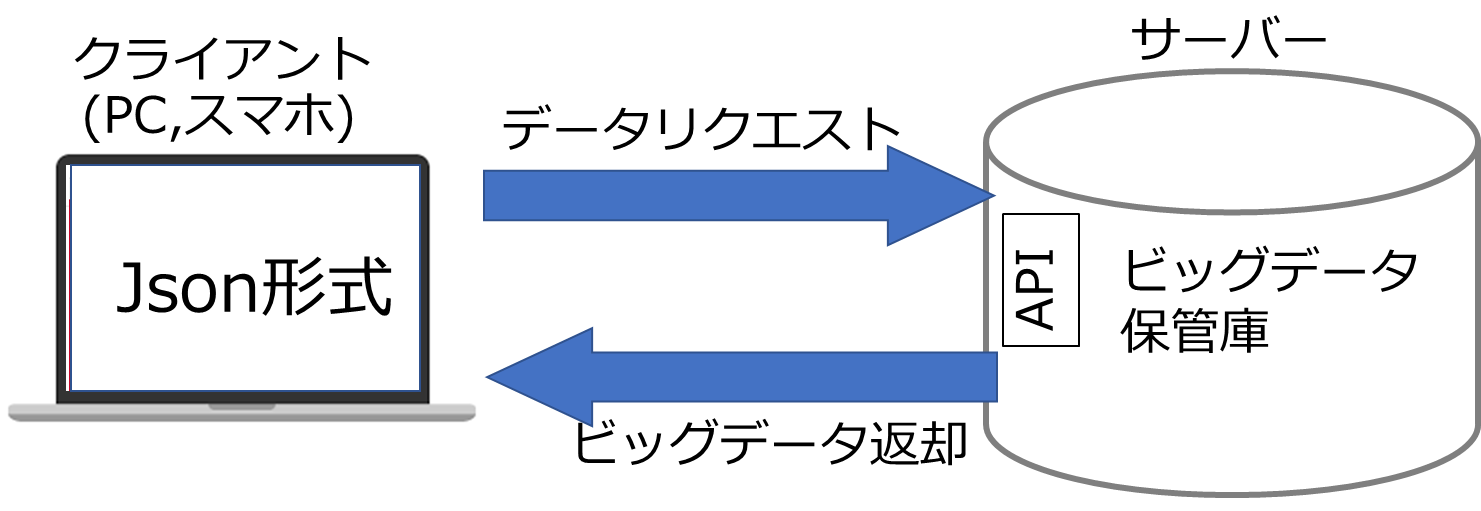

# 3. 地域経済分析システム RESAS
- 地域のデータに特化した公的ビッグデータ提供サービス（サーバー）
[RESAS}(https://contest.resas-portal.go.jp/2022/resas.html)
- メニューから定型的なグラフも閲覧できるが、限られている（効率的でない）。
- そこで、RESAS APIを使って、地域ビッグデータを一気に取り込んで、pythonで様々な解析を行う

## RESASのグラフをメニューから選択する 

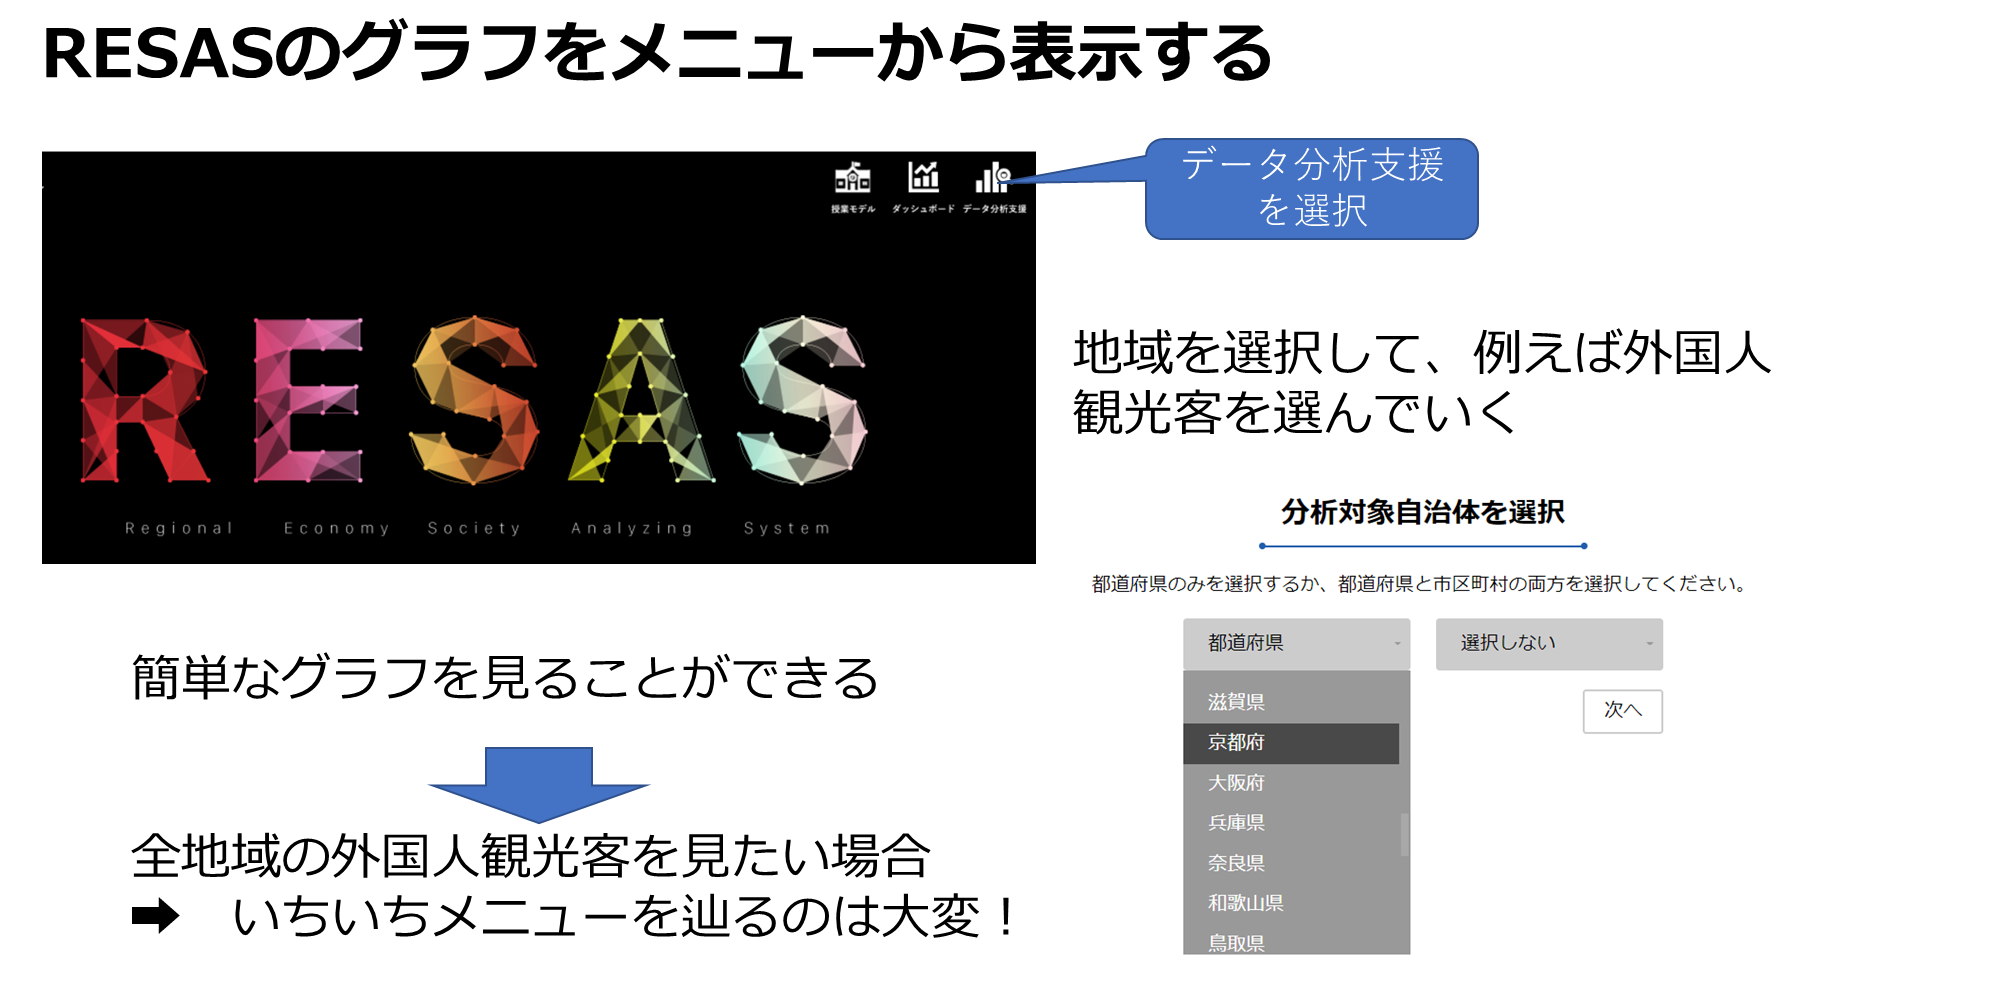

# 実習 RESAS API キーを取得する
- APIキー：アクセス権限をユーザー個々人に割り当てるためのキー。 APIを使うためにこのはキーが必要。
- キーは、ID, パスワードと同様な認証情報。プログラムから発行する認証情報ということでキーと呼ぶ
- 以下の手順でAPIキーを入手すること。API専用サイトは以下。  
  https://opendata.resas-portal.go.jp/
- 以下のページの下方の利用登録を押して必要な事項を記入（メール利用可能なアドレスを使う）して仮登録


<img src=attachment:9c7d508e-8502-46c1-ba93-788a6a81efcc.png width="50%">
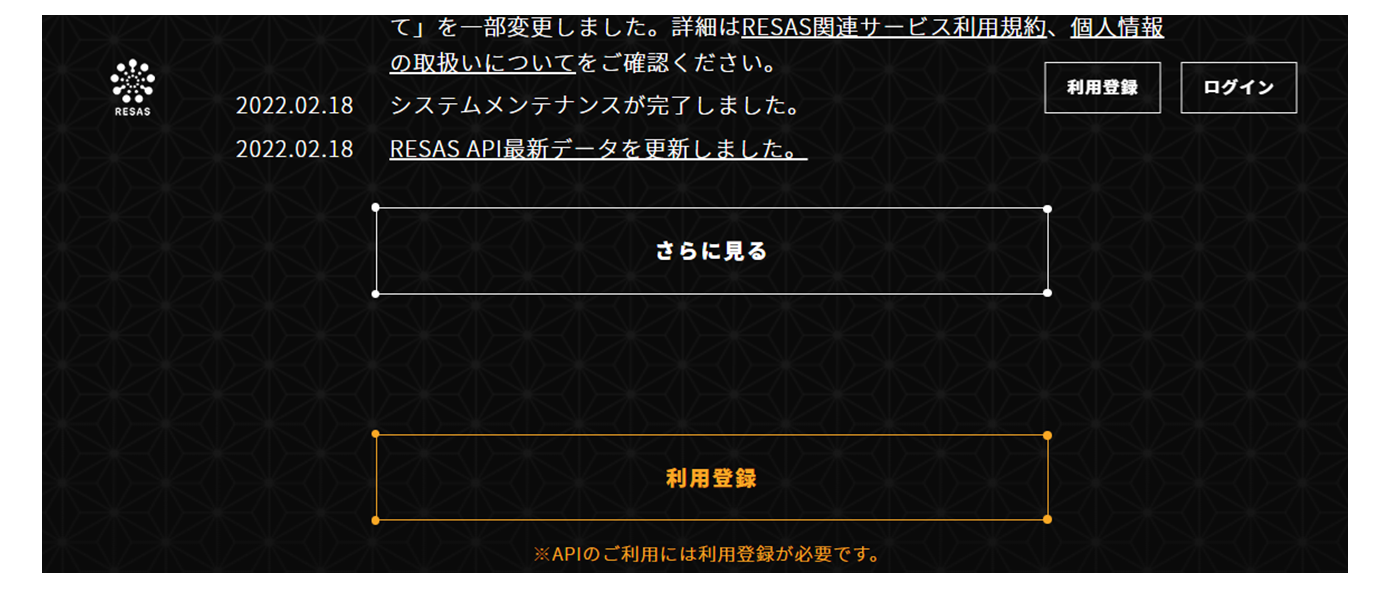

- 仮登録すると、以下のような本登録メールが送られてくる。URLをクリックする


<img src=attachment:ea49d8a7-fb8f-406d-8a8d-704474a844d1.png width='50%'>
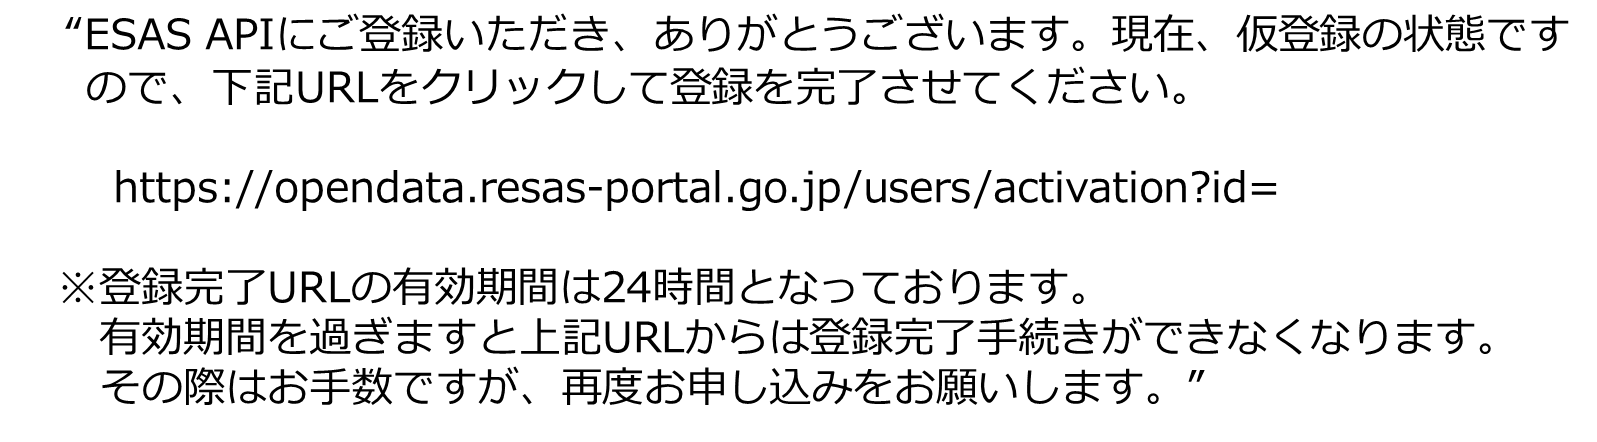

- 無事登録が終わると以下の画面になる。APIキーをpythonで使うのでコピペして自分にメールするなど紛失しないように保存する


<img src=attachment:36cb2029-dc9b-4b7c-8d5d-74fe45485619.png  width='50%'>
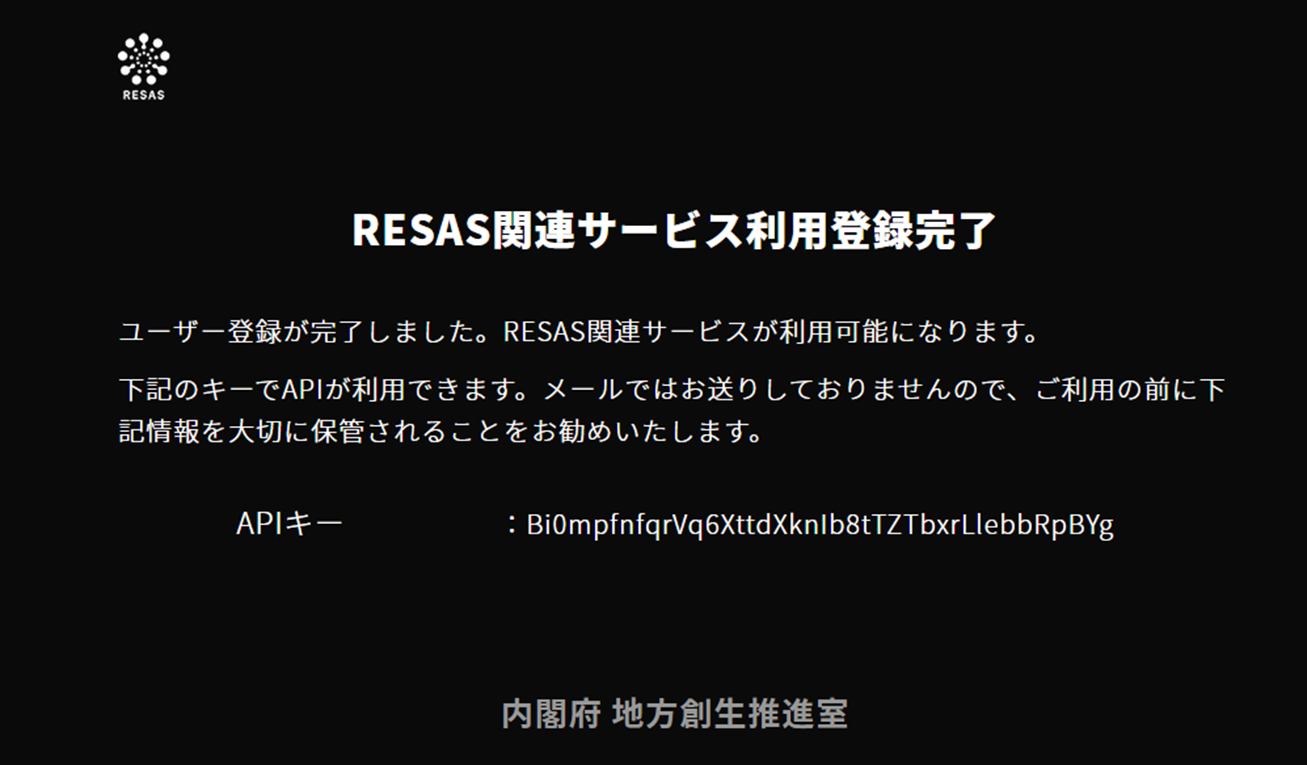

# 4. RESAS API プログラミング
- RESASの多様なデータから特定のデータを指定して取り込むためのプログラミング。以下のリンクの左ウインドウに取得できるデータが表示されている。  
https://opendata.resas-portal.go.jp/docs/api/v1/index.html
- これらのメニューから、例えば。**一人あたり地方税** を選ぶと、さらに都道府県、市区町村を指定できることがわかる。
- 都道府県、市区町村コードは統一コードがある（以下）  
http://www.tt.rim.or.jp/~ishato/tiri/code/code.htm
- APIから返却されるデータは**Json形式**で階層型になっている

例1. 一人当たり地方税データを取得するAPIプログラミング  
APIには利用方法を記述した仕様が必ずある。税金データを取得するAPI仕様  
https://opendata.resas-portal.go.jp/docs/api/v1/municipality/taxes/perYear.html  

1. 上記仕様の先頭にある以下のURLが、プログラムのどこに対応するのかを理解すること。  
GET api/v1/municipality/taxes/perYea  
2. 仕様のparametersの記述が、プログラムのどこに対応するのかを理解すること。  
   - 仕様のサイドメニュー上のほうにリンクがある。これもプログラムと対比すること
3. 仕様のResponsesの記述は返却されるデータ項目(JSON)  
   -  このデータ項目がpprint.pprint(d)で表示されることを理解すること
  
api_key={"X-API-KEY":""}の" ”内に、APIキーを貼り付けて実行

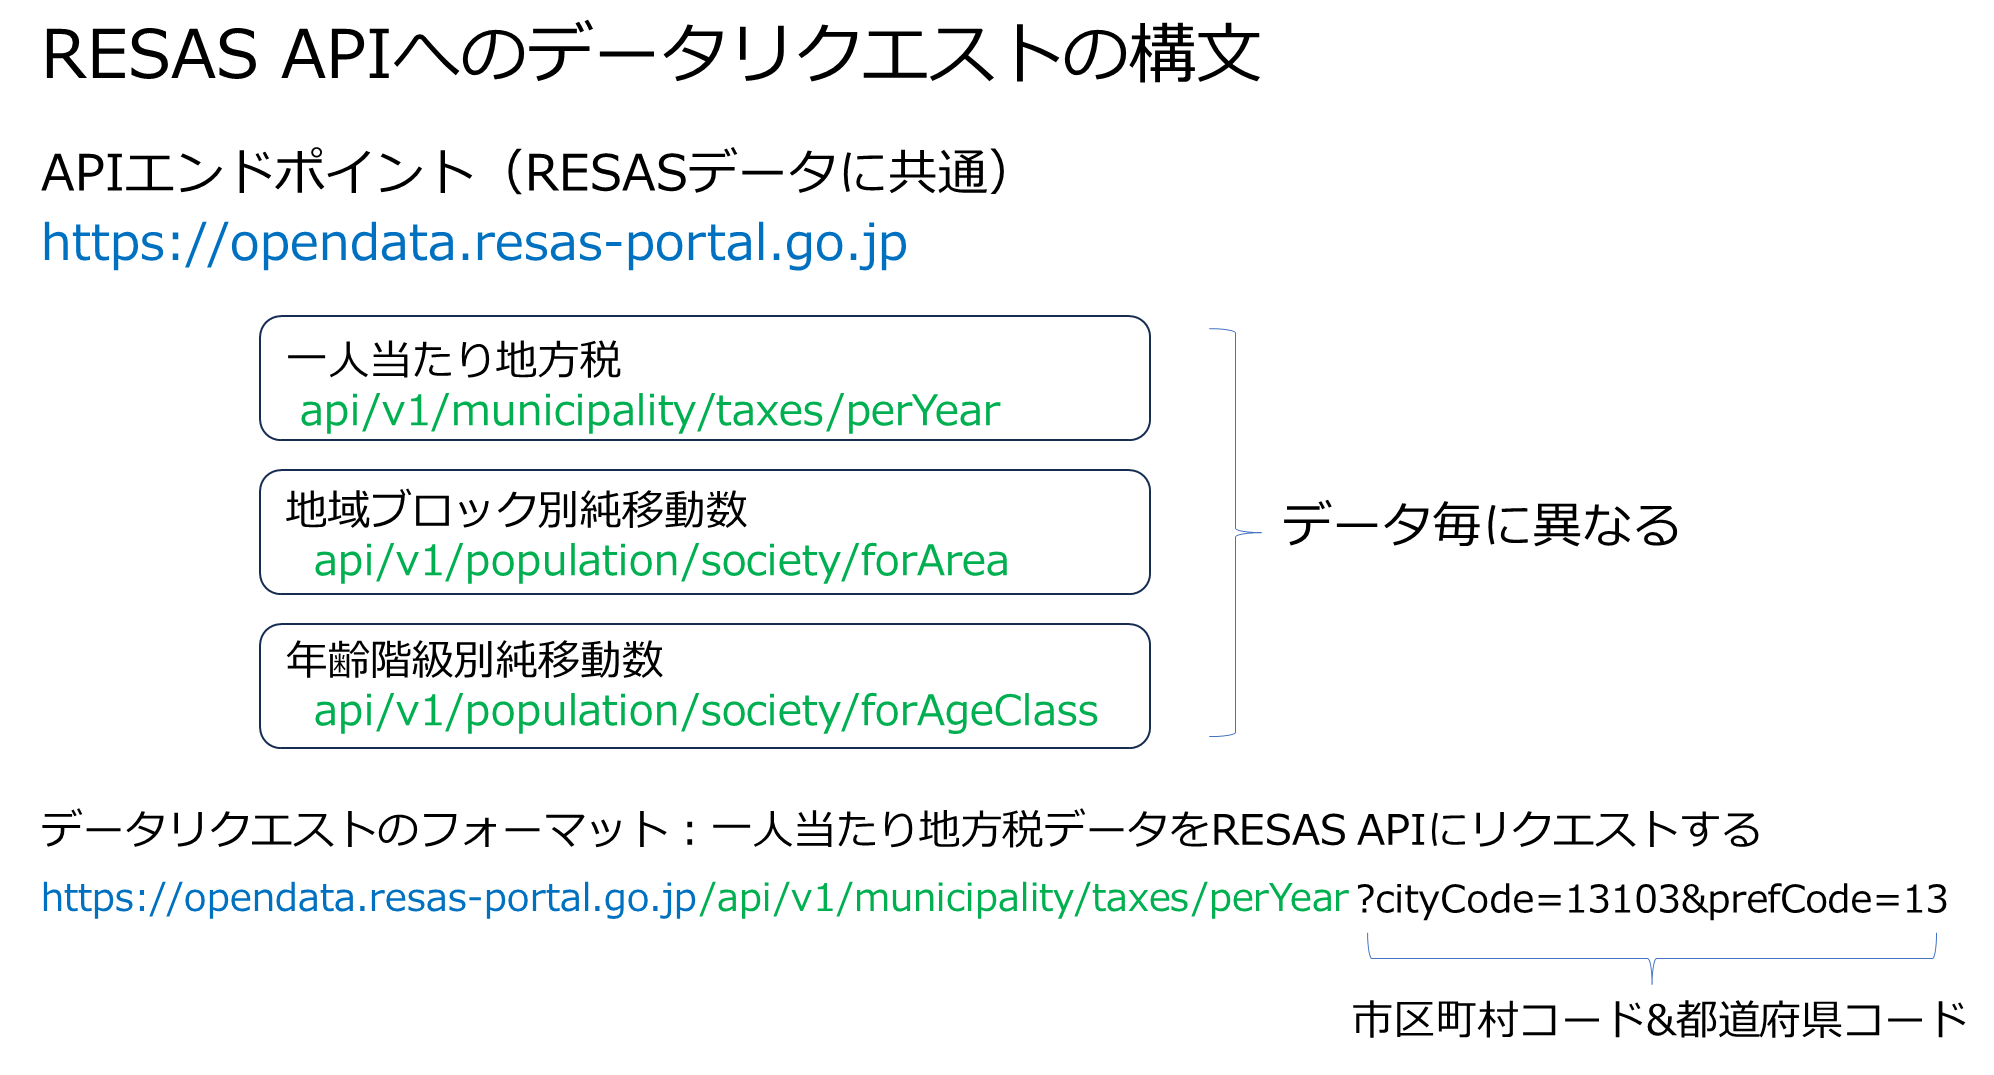

In [1]:
import json
import urllib.parse
import urllib.request
import pprint
import pandas as pd

url_base = 'https://opendata.resas-portal.go.jp/api/v1/municipality/taxes/perYear'

parameter = {'prefCode': 13, 'cityCode': 13103} #東京都　港区
url = url_base + '?' + urllib.parse.urlencode(parameter)
print(url)
api_key={"X-API-KEY":"Bi0mpfnfqrVq6XttdXknIb8tTZTbxrLlebbRpBYg"}
req = urllib.request.Request(url, headers=api_key)


with urllib.request.urlopen(req) as response:
    data = response.read()

d = json.loads(data.decode())

pprint.pprint(d)

https://opendata.resas-portal.go.jp/api/v1/municipality/taxes/perYear?prefCode=13&cityCode=13103
{'message': None,
 'result': {'cityCode': '13103',
            'cityName': '港区',
            'data': [{'value': 335, 'year': 2008},
                     {'value': 326, 'year': 2009},
                     {'value': 286, 'year': 2010},
                     {'value': 277, 'year': 2011},
                     {'value': 254, 'year': 2012},
                     {'value': 262, 'year': 2013},
                     {'value': 304, 'year': 2014},
                     {'value': 292, 'year': 2015},
                     {'value': 308, 'year': 2016},
                     {'value': 303, 'year': 2017},
                     {'value': 304, 'year': 2018},
                     {'value': 331, 'year': 2019},
                     {'value': 320, 'year': 2020},
                     {'value': 337, 'year': 2021}],
            'prefCode': 13,
            'prefName': '東京都'}}


# 演習1. 外国人観光客データの取得
  
**指定地域への国籍別訪問者数**のRESAS API仕様（以下）を読んで、下記の条件で来日外国人のデータを取得せよ。（基本的に
上記のコードを修正して作成すればよい）
https://opendata.resas-portal.go.jp/docs/api/v1/tourism/foreigners/forFrom.html

- year 2019, prefCode 埼玉のコード,purpose': 1- 
Year 2019, prefCoed 東京のコー,purpose': 1   


In [1]:
import json
import urllib.parse
import urllib.request
import pprint
import pandas as pd

url_base = 'https://opendata.resas-portal.go.jp/api/v1/tourism/foreigners/forFrom'

p = {'year': 2019,'prefCode': 11, 'purpose': 1}
url = url_base + '?' + urllib.parse.urlencode(p)
print(url)
api_key={"X-API-KEY":"Bi0mpfnfqrVq6XttdXknIb8tTZTbxrLlebbRpBYg"}
#api_key={"X-API-KEY":""}
req = urllib.request.Request(url, headers=api_key)

with urllib.request.urlopen(req) as response:
    data = response.read()

d = json.loads(data.decode())

pprint.pprint(d)

https://opendata.resas-portal.go.jp/api/v1/tourism/foreigners/forFrom?year=2019&prefCode=11&purpose=1
{'message': None,
 'result': {'changes': [{'countryCode': '103',
                         'countryName': '韓国',
                         'data': [{'quarter': 1, 'value': 8598, 'year': 2019},
                                  {'quarter': 2, 'value': 15552, 'year': 2019},
                                  {'quarter': 3, 'value': 10367, 'year': 2019},
                                  {'quarter': 4, 'value': 9884, 'year': 2019}]},
                        {'countryCode': '105',
                         'countryName': '中国',
                         'data': [{'quarter': 1, 'value': 11508, 'year': 2019},
                                  {'quarter': 2, 'value': 24033, 'year': 2019},
                                  {'quarter': 3, 'value': 17594, 'year': 2019},
                                  {'quarter': 4,
                                   'value': 15970,
                                  

<img src=attachment:203b548d-cc0a-4ffa-b095-ab131b6b03c1.png width='70%'>
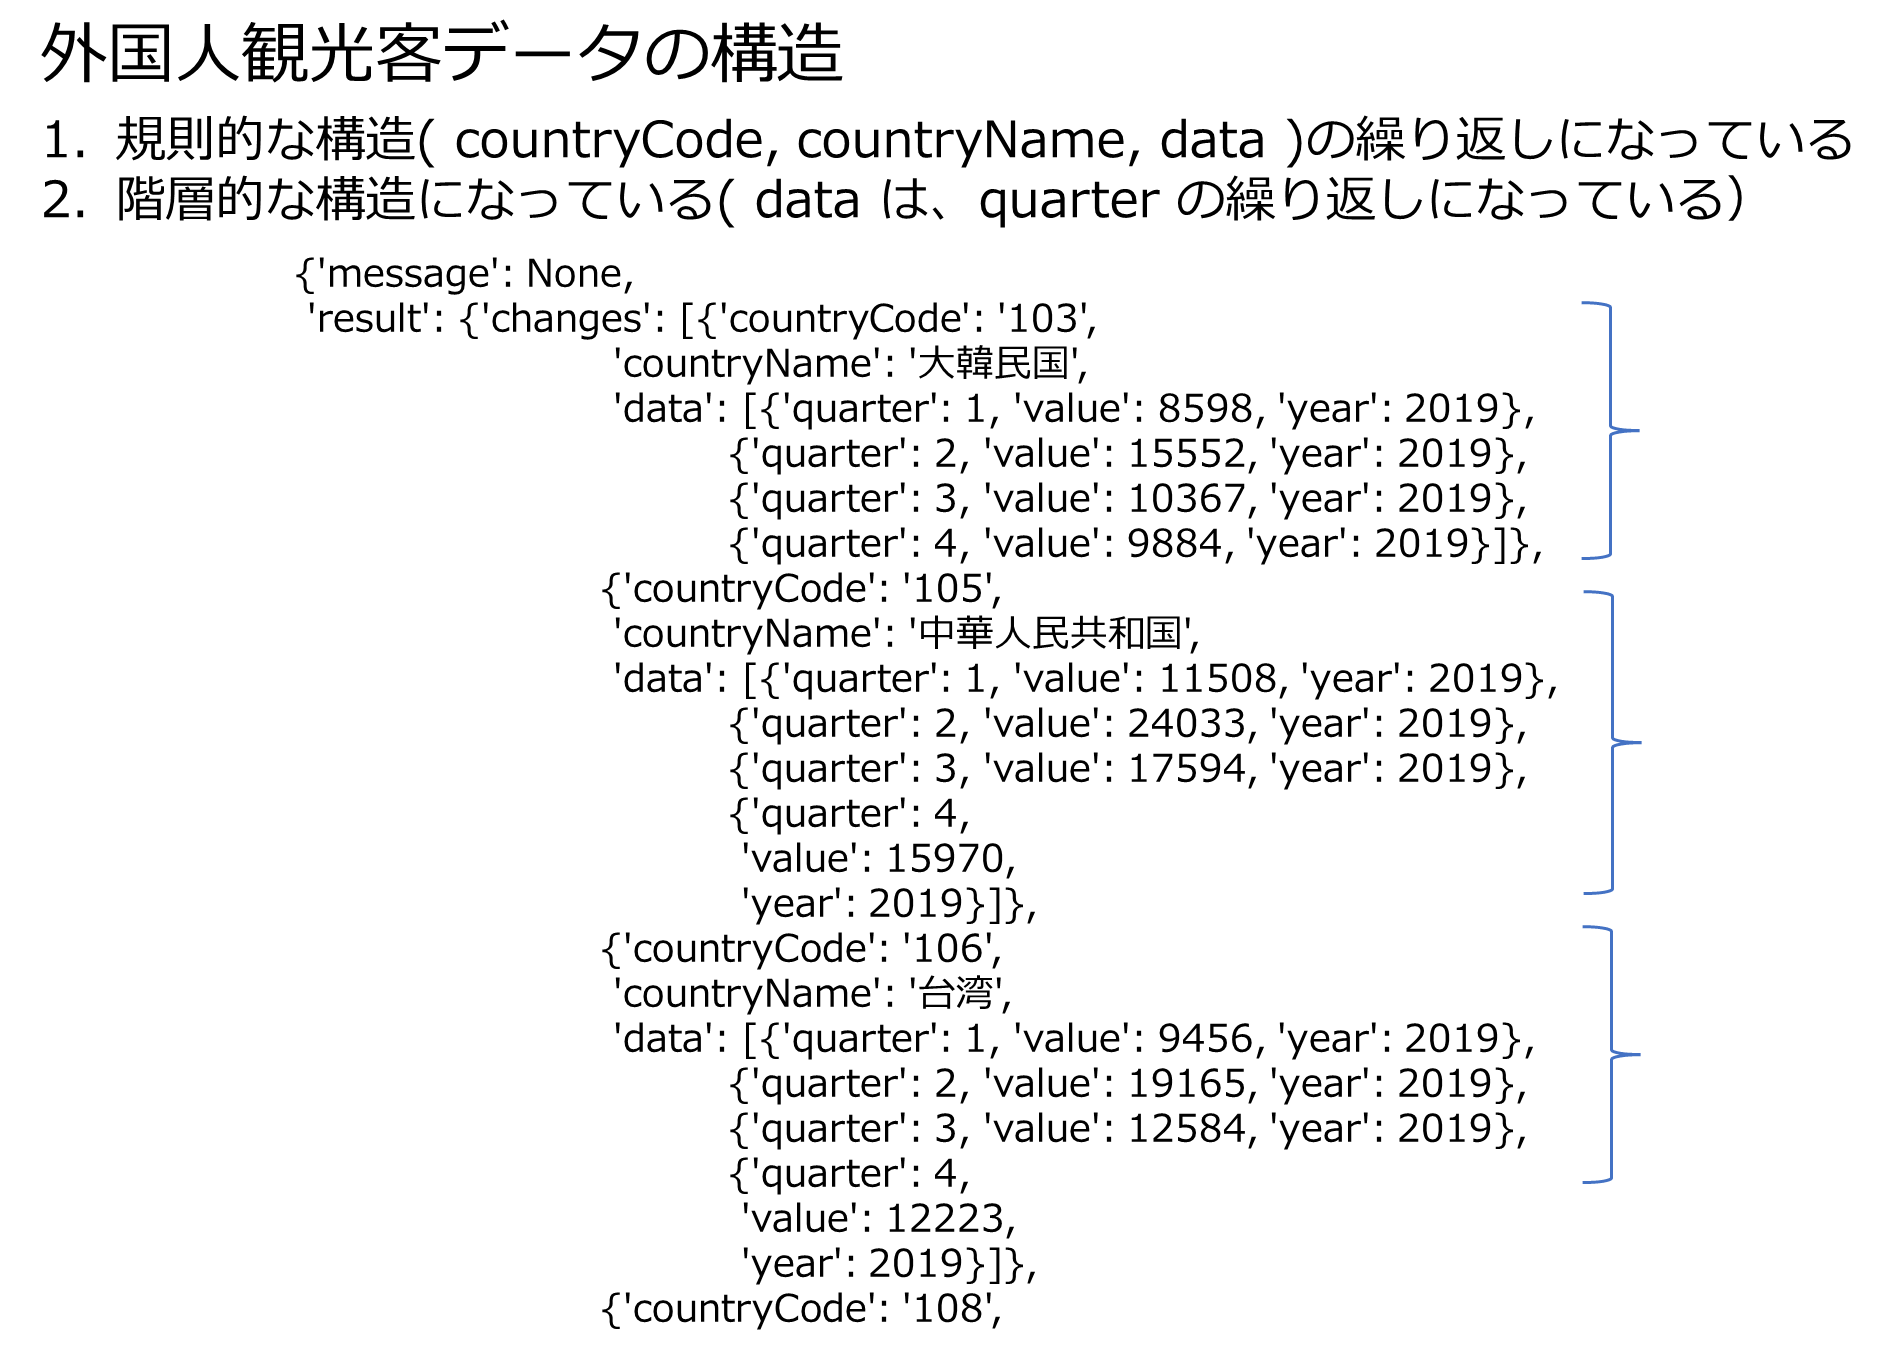

<img src=attachment:e3e88ff4-7649-431e-9307-5f58d301d2a3.png width='80%'>
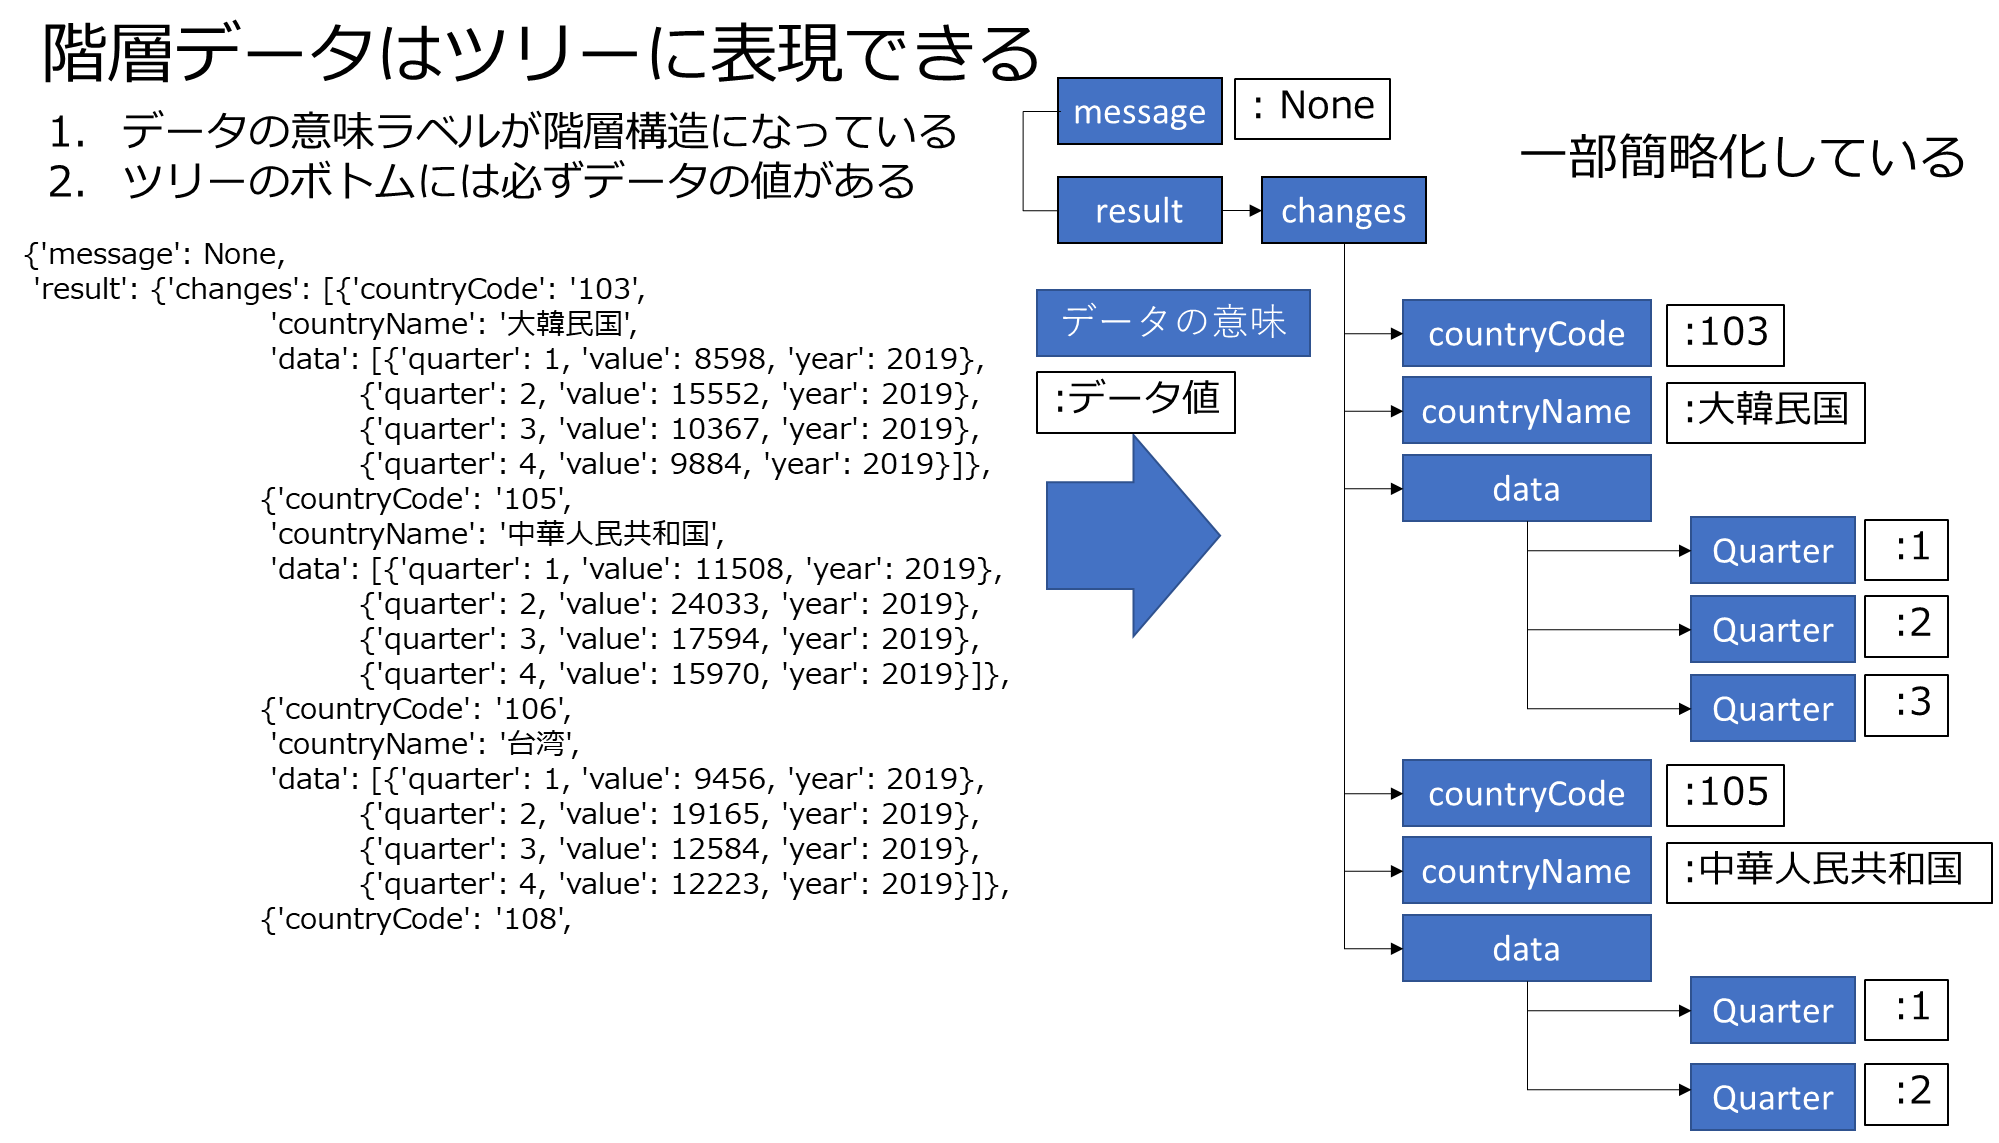

## パスを記述して特定のデータを取り出す


<img src=attachment:3d299bff-dde0-4dbf-ae92-25f66a7dfb82.png width='70%'>
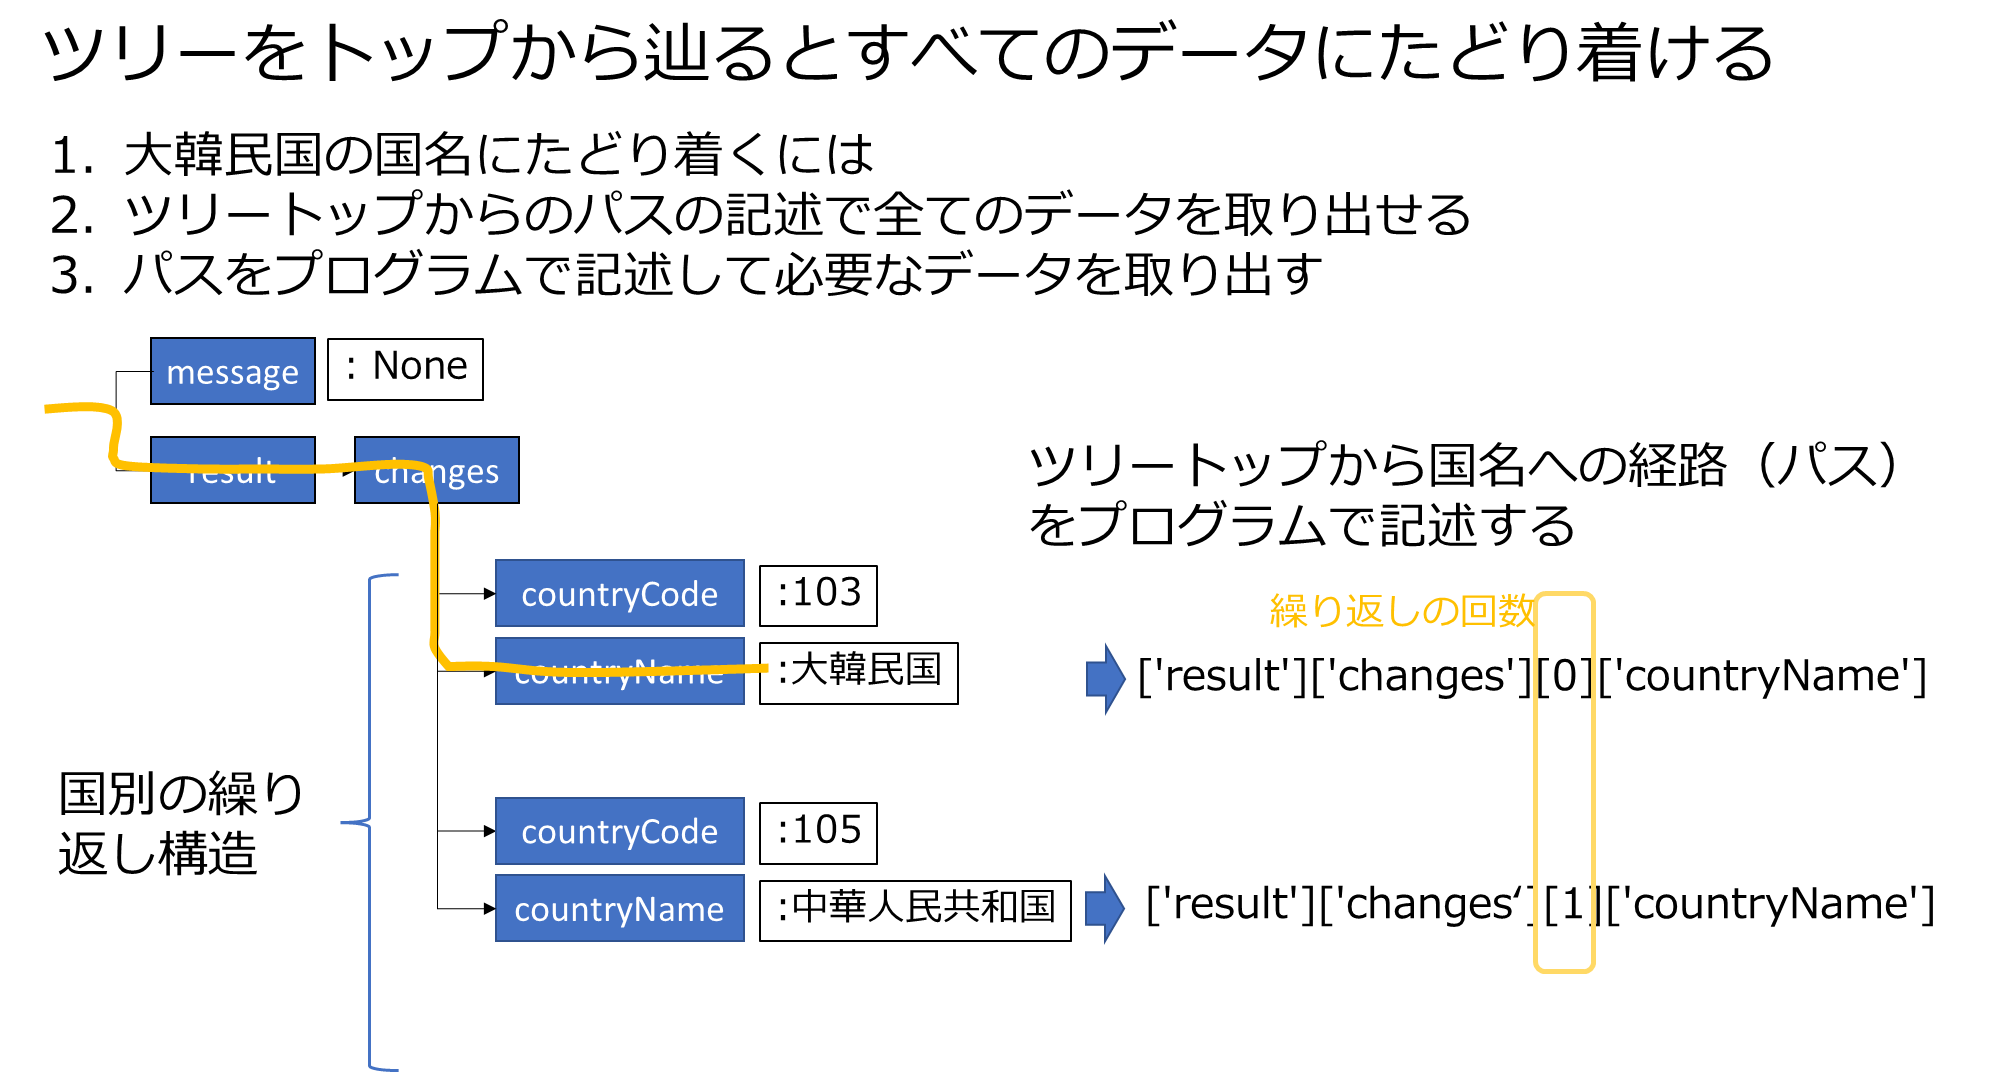

- 大韓民国を取り出す
- 台湾を取り出す

In [3]:
d['result']['changes'][0]['countryName']

'大韓民国'

<img src=attachment:6b2cf4e7-a56c-4f60-999c-5c3b5c03574f.png  width='60%'>
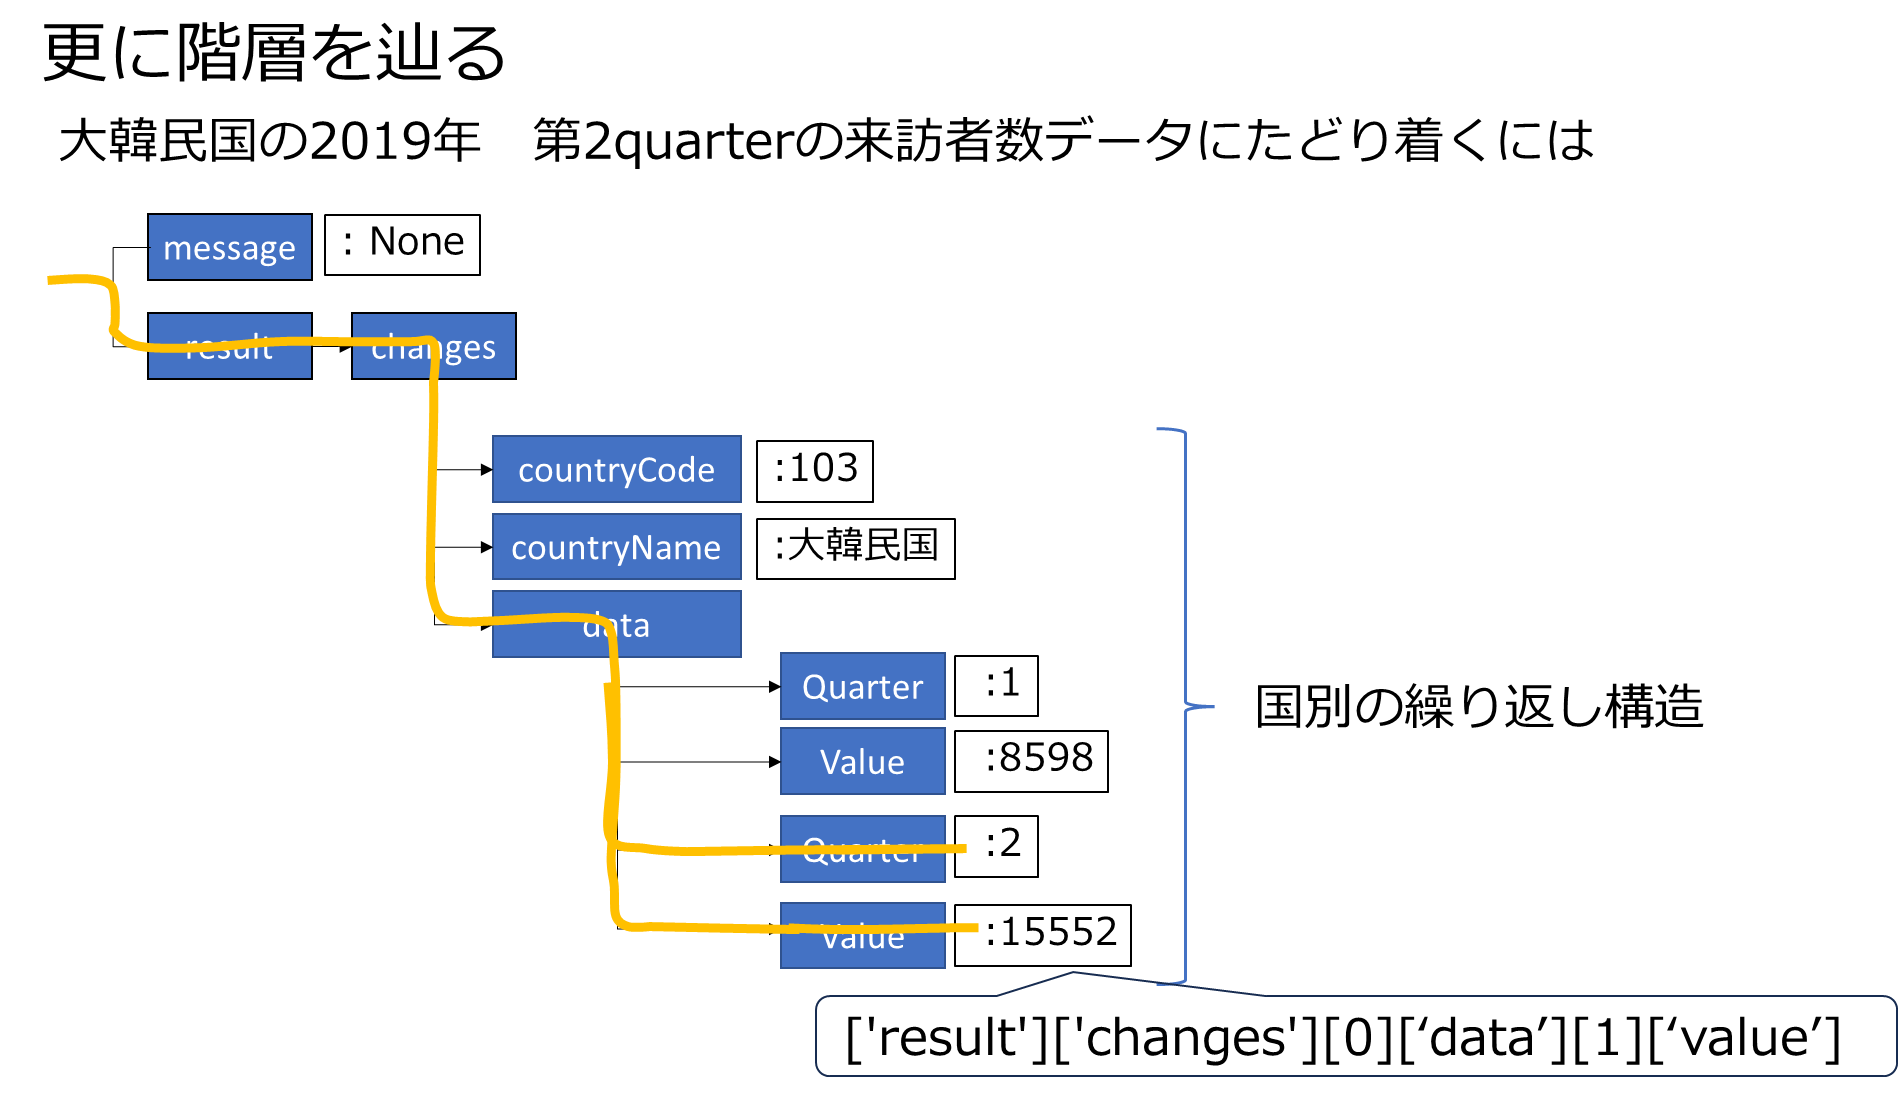

# 演習2.
1. 'data'にたどり着いてみる。
2. 更に第2四半期の訪問者数を表示するにはどうしたらよいか

In [3]:
d['result']['changes'][0]['data'][1]['value']

15552

# 演習3.
## 'countryName', 'data'  を連続して表示する
1. 以下のプログラムの出力結果をみて、'country name'  'data' を表示できるように修正してみてください。
1. 更に、'data'中の第1四半期～第4四半期の来訪者数を合計して表示する方法を考えてみてください。


In [4]:
for foreigners in d['result']['changes']:
    print(foreigners)

{'countryCode': '103', 'countryName': '大韓民国', 'data': [{'year': 2019, 'quarter': 1, 'value': 8598}, {'year': 2019, 'quarter': 2, 'value': 15552}, {'year': 2019, 'quarter': 3, 'value': 10367}, {'year': 2019, 'quarter': 4, 'value': 9884}]}
{'countryCode': '105', 'countryName': '中華人民共和国', 'data': [{'year': 2019, 'quarter': 1, 'value': 11508}, {'year': 2019, 'quarter': 2, 'value': 24033}, {'year': 2019, 'quarter': 3, 'value': 17594}, {'year': 2019, 'quarter': 4, 'value': 15970}]}
{'countryCode': '106', 'countryName': '台湾', 'data': [{'year': 2019, 'quarter': 1, 'value': 9456}, {'year': 2019, 'quarter': 2, 'value': 19165}, {'year': 2019, 'quarter': 3, 'value': 12584}, {'year': 2019, 'quarter': 4, 'value': 12223}]}
{'countryCode': '108', 'countryName': '香港', 'data': [{'year': 2019, 'quarter': 1, 'value': 1481}, {'year': 2019, 'quarter': 2, 'value': 8583}, {'year': 2019, 'quarter': 3, 'value': 3683}, {'year': 2019, 'quarter': 4, 'value': 7532}]}
{'countryCode': '110', 'countryName': 'ベトナム', 'd

In [4]:
import codecs
import pandas as pd
foreign_visitors=[]
for foreigners in d['result']['changes']:
    print(foreigners['countryName'], foreigners['data'])
    annual_value=0
    for f in foreigners['data']:
       annual_value += f['value']
    print(foreigners['countryName'], annual_value)
    foreign_visitors.append([foreigners['countryName'], annual_value])
f_visitors_df = pd.DataFrame(foreign_visitors, columns=['country_name','annual visitors'])
with codecs.open("forign_visitors.csv", "w", "ms932", "ignore") as all_data:
    f_visitors_df.to_csv(all_data, index=False, encoding="ms932", mode='w', header=True)

韓国 [{'year': 2019, 'quarter': 1, 'value': 8598}, {'year': 2019, 'quarter': 2, 'value': 15552}, {'year': 2019, 'quarter': 3, 'value': 10367}, {'year': 2019, 'quarter': 4, 'value': 9884}]
韓国 44401
中国 [{'year': 2019, 'quarter': 1, 'value': 11508}, {'year': 2019, 'quarter': 2, 'value': 24033}, {'year': 2019, 'quarter': 3, 'value': 17594}, {'year': 2019, 'quarter': 4, 'value': 15970}]
中国 69105
台湾 [{'year': 2019, 'quarter': 1, 'value': 9456}, {'year': 2019, 'quarter': 2, 'value': 19165}, {'year': 2019, 'quarter': 3, 'value': 12584}, {'year': 2019, 'quarter': 4, 'value': 12223}]
台湾 53428
香港 [{'year': 2019, 'quarter': 1, 'value': 1481}, {'year': 2019, 'quarter': 2, 'value': 8583}, {'year': 2019, 'quarter': 3, 'value': 3683}, {'year': 2019, 'quarter': 4, 'value': 7532}]
香港 21279
ベトナム [{'year': 2019, 'quarter': 1, 'value': 7432}, {'year': 2019, 'quarter': 2, 'value': 4959}, {'year': 2019, 'quarter': 3, 'value': 2131}, {'year': 2019, 'quarter': 4, 'value': 3842}]
ベトナム 18364
タイ [{'year': 2019, 'qu

### Json形式はビッグデータを表現する代表的な階層形式。しかし、階層形式データは、Json以外にも日常の多くの場面で見られる

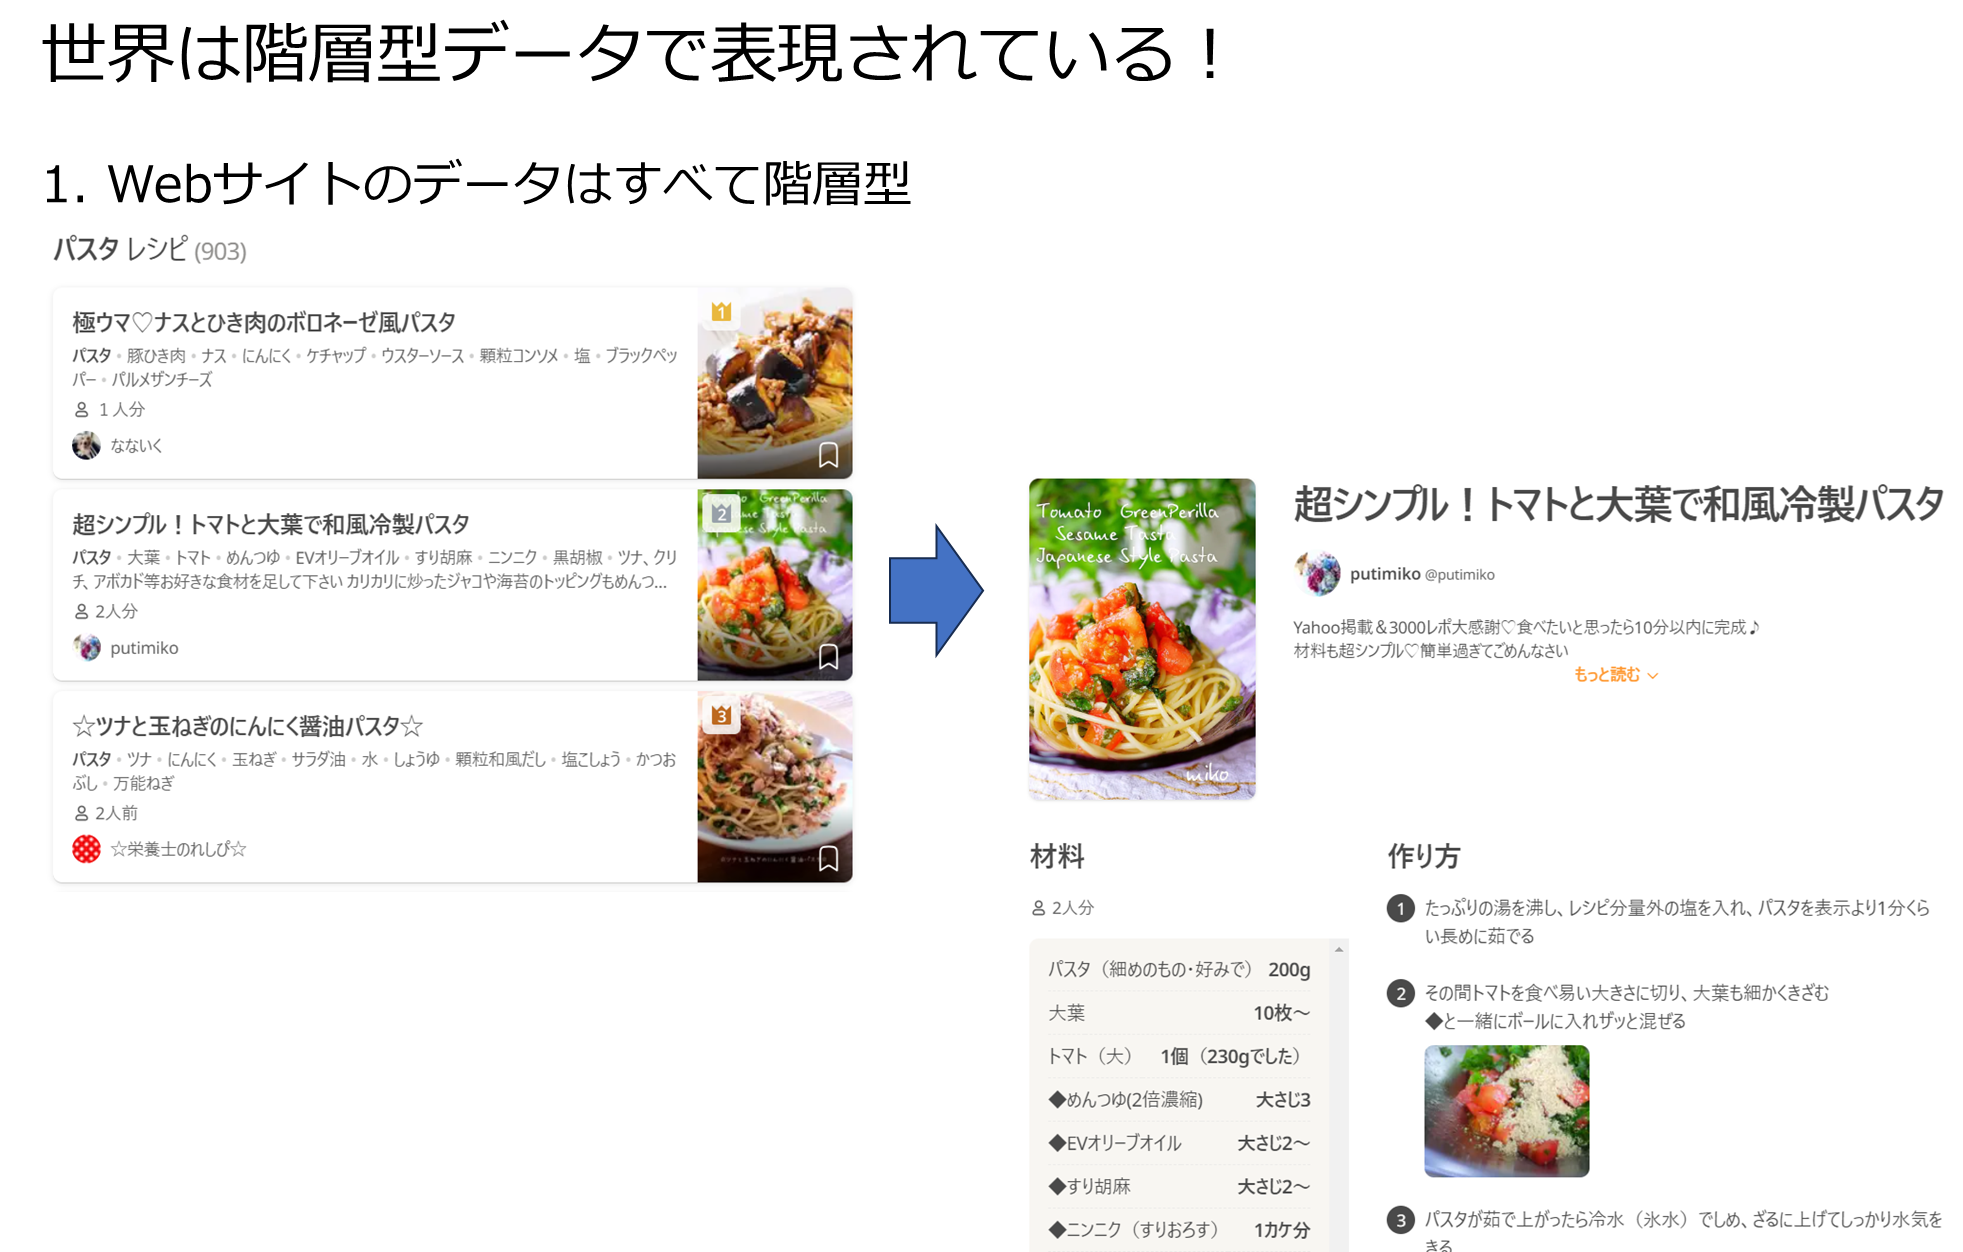

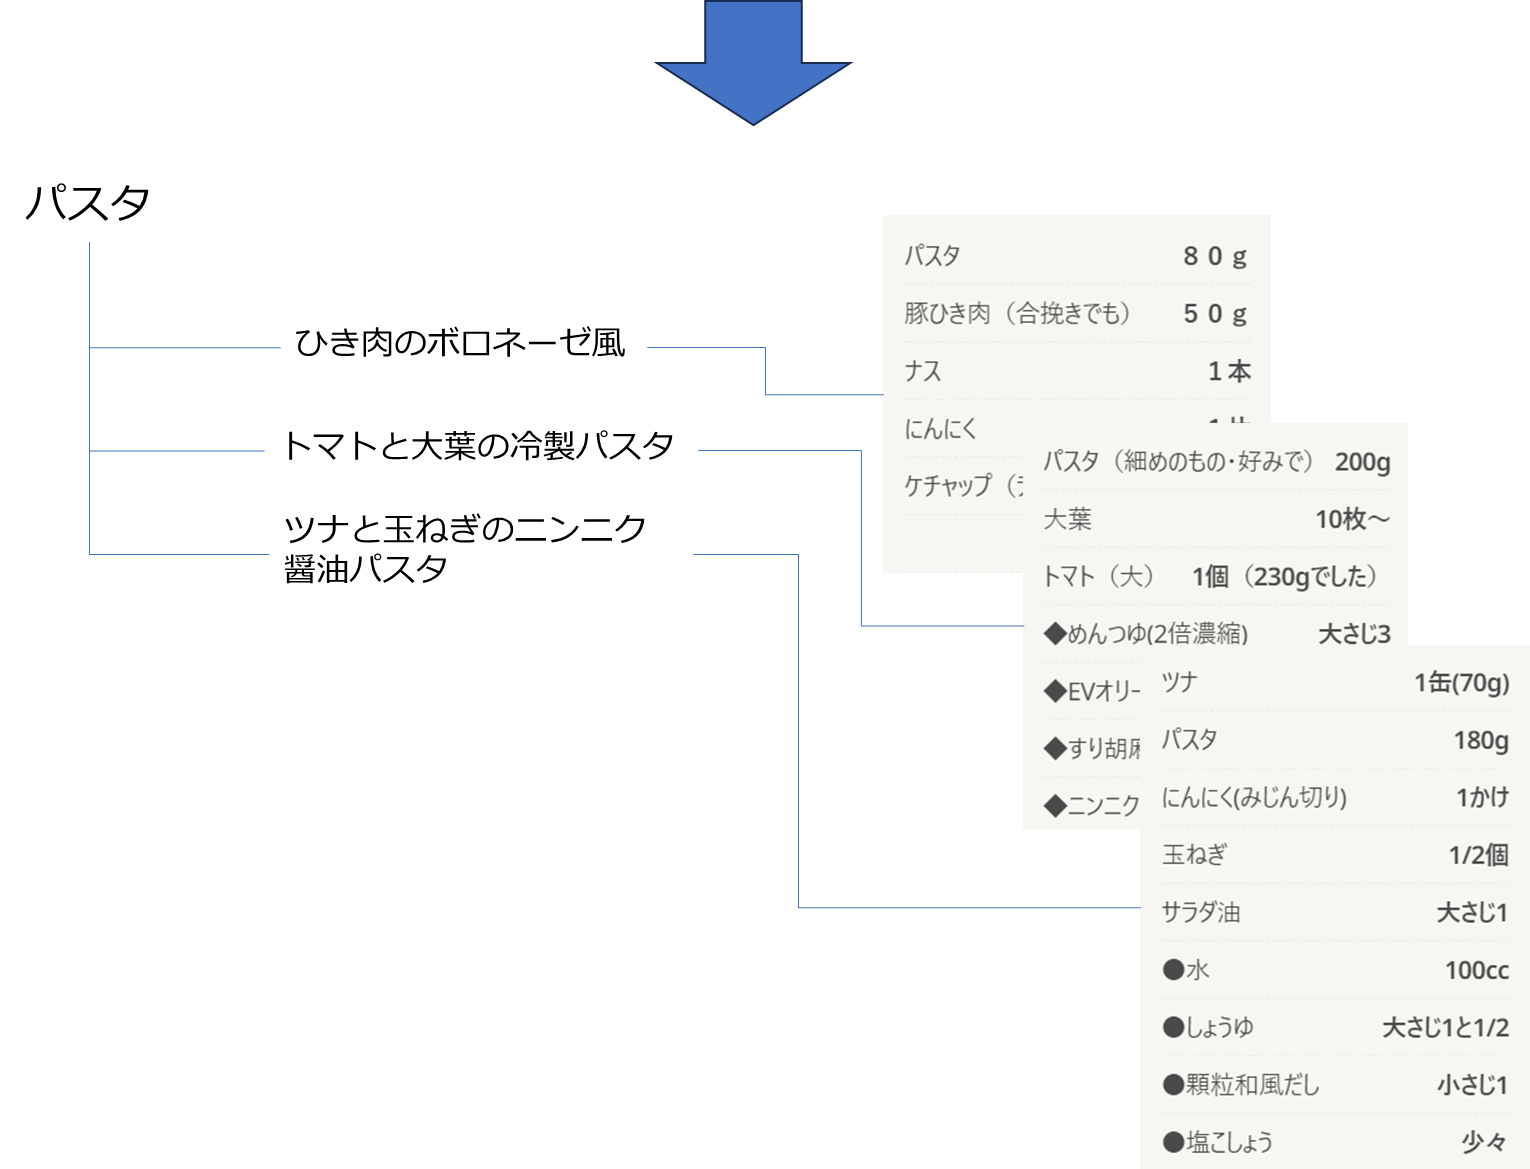